In [1]:
#nvidia_smi.exe  看GPU 的狀況
#iris_dataset 3d
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
import os
print("import done")

ModuleNotFoundError: No module named 'sklearn'

![title](img/iris.png)

![title](iris-machinelearning.png)

Part One 資料處理
1. 讀入資料(dictionary 型態，六個 Key)
2. 轉成 dataframe(pandas)
3. 轉成 array(numpy)
4. 分割成訓練與測試兩個dataset

Part Two 深度學習
1. 神經網路架構設計(查看網路架構參數個數)
2. 神經網路翻譯(設定optimizer方法)
3. 神經網路訓練(印出預測錯誤函數與準確函數曲線圖)
4. 神經網路驗證(用測試資料驗證準確率)
5. 神經網路預測(使用全新資料做預測)


In [2]:
#輸入資料集，資料集以 dict 字典資料型態儲存
iris_dataset = datasets.load_iris()

print("data load done")

data load done


In [3]:
#印出資料集 字典型態的 Key，資料值
print(iris_dataset.keys())
for key in iris_dataset.keys():
    print("key :",key ,iris_dataset[key])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
key : data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.

<img src="./iris-machinelearning.png",width=1200,height=600>

In [4]:
#sepal length (cm) 萼片長度
#sepal width (cm) 萼片寬度
#petal length (cm) 花瓣長度
#petal width (cm) 花瓣寬度
#setosa 山鳶尾
#versicolor 變色鳶尾
#virginica 維吉尼亞鳶尾
#從 字典資料集 轉成 pandas dataframe
df = pd.DataFrame(iris_dataset["data"],
                  columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
# df.head(10)
df.tail(7)


,sepal_length,sepal_width,petal_length,petal_width
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
#將字典資料集的標準答案轉成 Numpy Array
target = iris_dataset["target"]
print(target)
print(type(target))
print(target)
# 將dataframe 資料集 增加一個標準答案數字的欄位
df["target"] = target
df

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# print(iris_dataset["target_names"][df["target"]])
# 將dataframe 資料集 增加一個標準答案英文名稱的欄位
df["target_names"] = iris_dataset["target_names"][df["target"]]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# df.to_csv("./df_iris.csv"), 
# df.tocsv("df_iris.csv",index = false), no index
# df = pd.read_csv("./iris_dataset.csv")

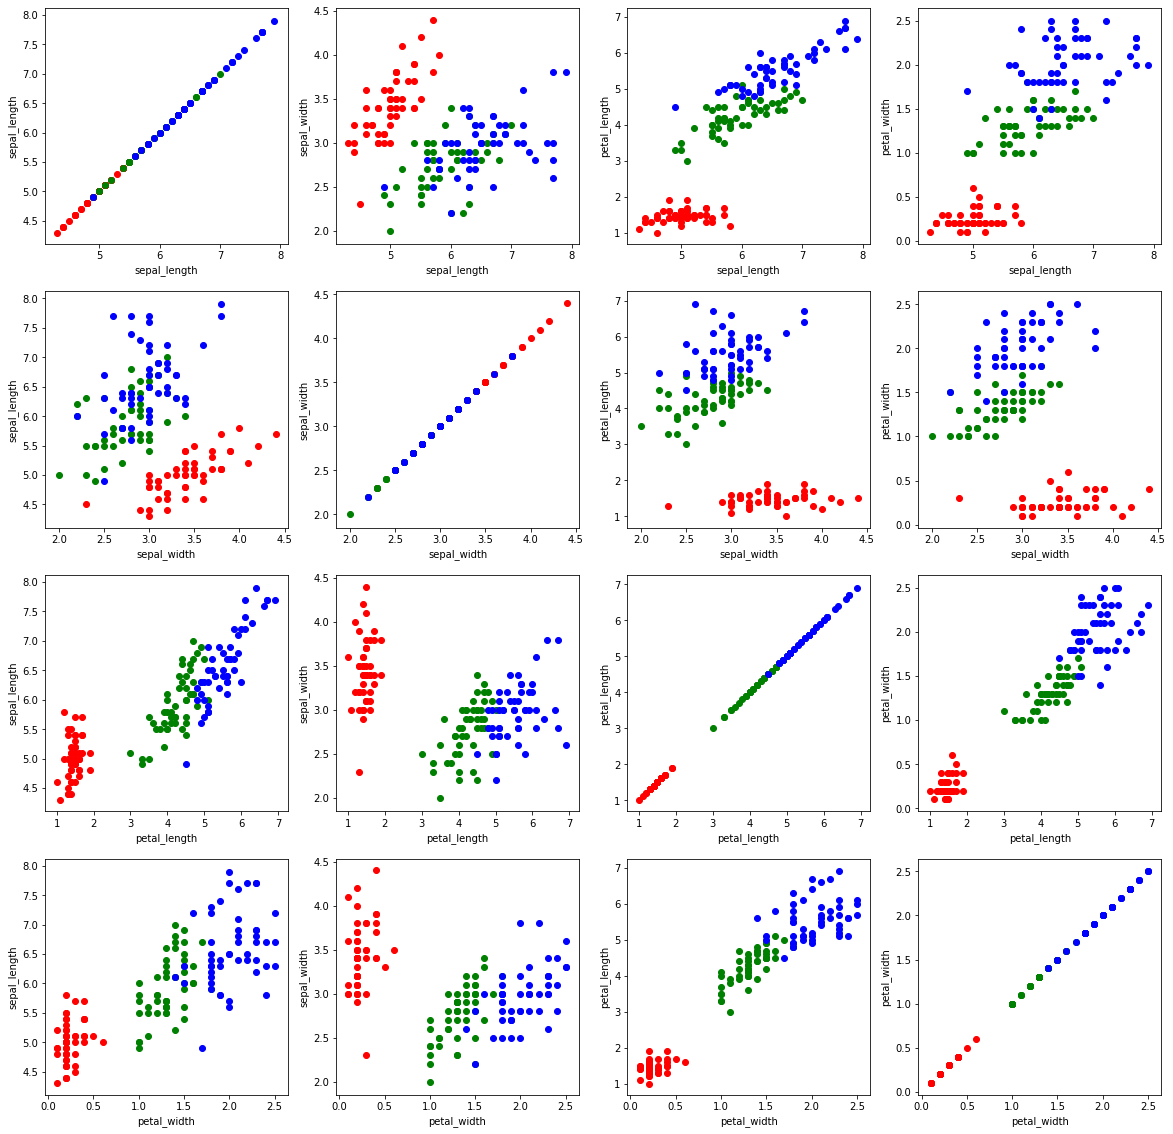

In [9]:
#資料集有四個特徵欄位(花萼長、寬， 花瓣長、寬)，
#任選兩個欄位畫出資料分布狀況，藉以觀察那些欄位特徵對分類特別有幫助。
#不同類別使用不同顏色區分
color = ["red", "green", "blue"]

plt.figure(figsize=(20,20))
# plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
for i in range(4*4):
    plt.subplot(4, 4, i+1)
    plt.xlabel(df.columns[i//4]) # 選用一個特徵欄位作為 X軸
    plt.ylabel(df.columns[i%4])   # 選用一個特徵欄位作為 Y軸
    for j in range(len(iris_dataset["target_names"])):
        plt.scatter(df.iloc[:,i//4][df.target == j],
                    df.iloc[:,i%4][df.target == j],
                    c = color[j])
    
plt.show()
    